In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
print(tf.sysconfig.get_build_info()['is_cuda_build'])

False


In [4]:
pretrained_model_path = r"D:\TensorflowPractice\venv\Models\Inception\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [5]:
pretrained_model = tf.keras.applications.inception_v3.InceptionV3(
    input_shape=(150,150,3),
    include_top = False,
    weights = None
)

In [6]:
pretrained_model.load_weights(pretrained_model_path)

In [7]:
for layer in pretrained_model.layers:
    layer.trainable = False

In [8]:
last_layer = pretrained_model.get_layer('mixed7')
last_output = last_layer.output

In [9]:
last_output

<KerasTensor shape=(None, 7, 7, 768), dtype=float32, sparse=False, ragged=False, name=keras_tensor_228>

In [10]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.Model(pretrained_model.input,x)

model.compile(
    loss='binary_crossentropy', 
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), 
    metrics = ['accuracy'])

In [11]:
TRAIN_DIR = r"D:\TensorflowPractice\venv\Datasets\horse-or-human"
VAL_DIR = r"D:\TensorflowPractice\venv\Datasets\validation-horse-or-human"

train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size = (150,150),
    batch_size = 32,
    label_mode = 'binary'
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size = (150,150),
    batch_size = 32,
    label_mode = 'binary'
)

Found 1027 files belonging to 2 classes.
Found 256 files belonging to 2 classes.


In [12]:
trained_dataset_shuffled = (
    train_dataset
    .cache()
    .shuffle(1000)
    .prefetch(tf.data.AUTOTUNE)
) 

validation_dataset_shuffled = (
    validation_dataset
    .cache()
    .prefetch(tf.data.AUTOTUNE)
)

In [13]:
rescale_layer = tf.keras.layers.Rescaling(1./255)

train_dataset_rescaled = trained_dataset_shuffled.map(lambda image, label: (rescale_layer(image),label))
validation_dataset_rescaled = validation_dataset_shuffled.map(lambda image, label: (rescale_layer(image),label))

In [14]:
model_augmentation = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(150,150,3)),
    tf.keras.layers.RandomFlip(mode="horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(factor=0.2,fill_mode='nearest'),
    tf.keras.layers.RandomTranslation(0.2,0.2,fill_mode='nearest'),
    tf.keras.layers.RandomZoom(0.2,fill_mode='nearest')
])

In [15]:
model_with_aug = tf.keras.Sequential([
    model_augmentation,
    model
])

In [16]:
model_with_aug.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

In [17]:

history = model_with_aug.fit(
    train_dataset_rescaled,
    validation_data = validation_dataset_rescaled,
    epochs=20,
    verbose = 2
)

Epoch 1/20
33/33 - 21s - 639ms/step - accuracy: 0.8374 - loss: 0.4363 - val_accuracy: 1.0000 - val_loss: 0.0143
Epoch 2/20
33/33 - 11s - 321ms/step - accuracy: 0.9494 - loss: 0.1308 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 3/20
33/33 - 11s - 323ms/step - accuracy: 0.9572 - loss: 0.1041 - val_accuracy: 0.9961 - val_loss: 0.0061
Epoch 4/20
33/33 - 10s - 318ms/step - accuracy: 0.9659 - loss: 0.0902 - val_accuracy: 0.9922 - val_loss: 0.0246
Epoch 5/20
33/33 - 11s - 334ms/step - accuracy: 0.9776 - loss: 0.0623 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/20
33/33 - 11s - 322ms/step - accuracy: 0.9796 - loss: 0.0457 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 7/20
33/33 - 10s - 318ms/step - accuracy: 0.9815 - loss: 0.0501 - val_accuracy: 1.0000 - val_loss: 6.6690e-04
Epoch 8/20
33/33 - 10s - 318ms/step - accuracy: 0.9825 - loss: 0.0418 - val_accuracy: 1.0000 - val_loss: 3.5216e-04
Epoch 9/20
33/33 - 11s - 336ms/step - accuracy: 0.9922 - loss: 0.0259 - val_accuracy: 1.0000 - v

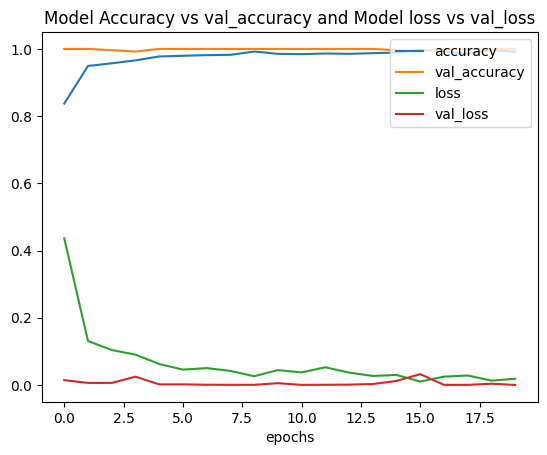

In [19]:
from matplotlib import pyplot

pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Model Accuracy vs val_accuracy and Model loss vs val_loss')
pyplot.xlabel('epochs')
pyplot.legend(['accuracy','val_accuracy','loss','val_loss'],loc='upper right')
pyplot.show()

In [20]:
y = tf.keras.layers.Flatten()(last_output)
y = tf.keras.layers.Dense(1024,activation='relu')(y)
y = tf.keras.layers.Dropout(0.5)(y)
y = tf.keras.layers.Dense(1,activation='sigmoid')(y)

model1 = tf.keras.Model(pretrained_model.input, y)

model1.compile(loss='binary_crossentropy', 
               optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
               metrics=['accuracy'])

In [21]:
model_with_aug1 = tf.keras.Sequential([
    model_augmentation,
    model1
])

model_with_aug1.compile(loss='binary_crossentropy', 
               optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
               metrics=['accuracy'])

In [22]:
history1 = model_with_aug1.fit(
    train_dataset_rescaled,
    validation_data = validation_dataset_rescaled,
    epochs=12,
    verbose = 2
)

Epoch 1/12
33/33 - 19s - 563ms/step - accuracy: 0.7819 - loss: 2.8416 - val_accuracy: 1.0000 - val_loss: 0.0169
Epoch 2/12
33/33 - 11s - 334ms/step - accuracy: 0.9211 - loss: 0.2891 - val_accuracy: 0.9883 - val_loss: 0.0150
Epoch 3/12
33/33 - 11s - 322ms/step - accuracy: 0.9533 - loss: 0.1416 - val_accuracy: 1.0000 - val_loss: 4.2758e-05
Epoch 4/12
33/33 - 11s - 325ms/step - accuracy: 0.9426 - loss: 0.2417 - val_accuracy: 0.9844 - val_loss: 0.0478
Epoch 5/12
33/33 - 11s - 332ms/step - accuracy: 0.9484 - loss: 0.1671 - val_accuracy: 1.0000 - val_loss: 4.3337e-04
Epoch 6/12
33/33 - 11s - 325ms/step - accuracy: 0.9562 - loss: 0.1524 - val_accuracy: 0.9805 - val_loss: 0.0592
Epoch 7/12
33/33 - 11s - 323ms/step - accuracy: 0.9523 - loss: 0.1571 - val_accuracy: 1.0000 - val_loss: 8.7440e-05
Epoch 8/12
33/33 - 11s - 324ms/step - accuracy: 0.9630 - loss: 0.1257 - val_accuracy: 1.0000 - val_loss: 9.4072e-04
Epoch 9/12
33/33 - 11s - 337ms/step - accuracy: 0.9611 - loss: 0.1308 - val_accuracy: 1.

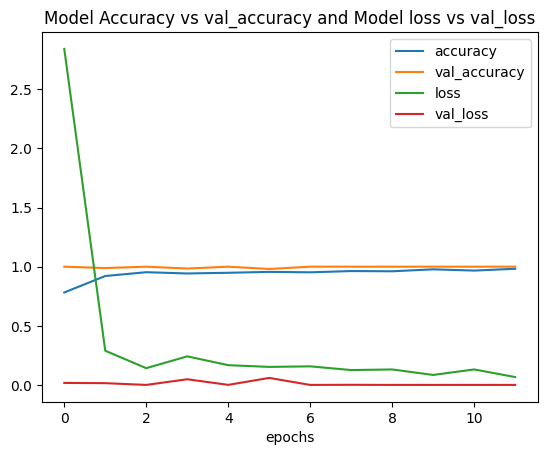

In [23]:
pyplot.plot(history1.history['accuracy'])
pyplot.plot(history1.history['val_accuracy'])
pyplot.plot(history1.history['loss'])
pyplot.plot(history1.history['val_loss'])
pyplot.title('Model Accuracy vs val_accuracy and Model loss vs val_loss')
pyplot.xlabel('epochs')
pyplot.legend(['accuracy','val_accuracy','loss','val_loss'],loc='upper right')
pyplot.show()